In [3]:
%tensorflow_version 1.x
import tensorflow
tensorflow.__version__


'1.15.2'

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import numpy as np
import cv2
import os
import imutils

from sklearn.metrics import classification_report 
from sklearn.metrics import f1_score ,accuracy_score

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

from os import listdir
from os.path import isfile, join
import tensorflow
import csv
import pandas


Using TensorFlow backend.


In [5]:
keras.__version__

'2.3.1'

In [6]:
tensorflow.__version__

'1.15.2'

In [7]:
a= [0,1,2,3]
a[1:]

[1, 2, 3]

In [8]:
img_data= pandas.read_csv('drive/My Drive/korat_sauce/img_hog_li.csv', header = None,na_values=0)
img_data = img_data.replace(np.nan,0)
train_data_list = np.array(img_data.loc[:, img_data.columns != 0])
sol_of_train_data = np.array(img_data[0])

In [9]:

sol_of_train_data = np.array(sol_of_train_data)

In [10]:

num_classes = 4
epochs = 2000


In [11]:
X_train, X_test, y_train, y_test = train_test_split(train_data_list, sol_of_train_data, test_size=0.2,random_state=1)

In [12]:
y_test[0]

4

In [13]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y_test)

y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [14]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [15]:
y_train[0]

array([0., 0., 1., 0.], dtype=float32)

In [16]:
model = Sequential()
model.add(Dense(num_classes, input_dim=3780, activation='sigmoid'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 15124     
Total params: 15,124
Trainable params: 15,124
Non-trainable params: 0
_________________________________________________________________


In [18]:
 model.compile(loss="binary_crossentropy",
              optimizer= "SGD",
              metrics=["accuracy"]
               )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [19]:
seq_model = model.fit(X_train, y_train,
              batch_size=32,
              epochs=epochs,
              validation_data=(X_test, y_test),
              shuffle=True)


Train on 2174 samples, validate on 544 samples
Epoch 1/2000
2174/2174 [==============================] - 0s 215us/step - loss: 0.5843 - accuracy: 0.7315 - val_loss: 0.5513 - val_accuracy: 0.7500
Epoch 2/2000
2174/2174 [==============================] - 0s 95us/step - loss: 0.5503 - accuracy: 0.7500 - val_loss: 0.5466 - val_accuracy: 0.7500
Epoch 3/2000
2174/2174 [==============================] - 0s 85us/step - loss: 0.5459 - accuracy: 0.7500 - val_loss: 0.5426 - val_accuracy: 0.7500
Epoch 4/2000
2174/2174 [==============================] - 0s 82us/step - loss: 0.5418 - accuracy: 0.7500 - val_loss: 0.5392 - val_accuracy: 0.7500
Epoch 5/2000
2174/2174 [==============================] - 0s 94us/step - loss: 0.5377 - accuracy: 0.7500 - val_loss: 0.5360 - val_accuracy: 0.7500
Epoch 6/2000
2174/2174 [==============================] - 0s 88us/step - loss: 0.5340 - accuracy: 0.7500 - val_loss: 0.5324 - val_accuracy: 0.7500
Epoch 7/2000
2174/2174 [==============================] - 0s 85us/ste

In [20]:
import pandas as pd
metrics = pd.DataFrame(seq_model.history)
metrics

,val_loss,val_accuracy,loss,accuracy
0,0.551328,0.750000,0.584289,0.731486
1,0.546574,0.750000,0.550302,0.750000
2,0.542598,0.750000,0.545879,0.750000
3,0.539212,0.750000,0.541765,0.750000
4,0.536004,0.750000,0.537713,0.750000
...,...,...,...,...
1995,0.329316,0.863971,0.168100,0.955382
1996,0.329287,0.863971,0.168093,0.955497
1997,0.329152,0.863051,0.168042,0.955267
1998,0.329093,0.863971,0.167992,0.955267


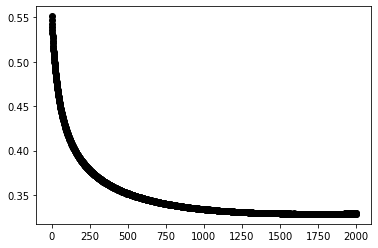

In [21]:
import matplotlib.pyplot as plt
plt.plot(list(seq_model.history.values())[0],'k-o')

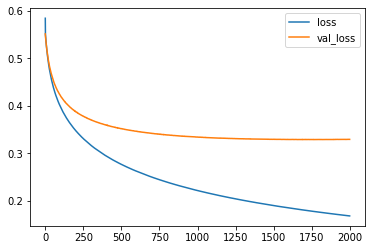

In [22]:
metrics[['loss', 'val_loss']].plot()

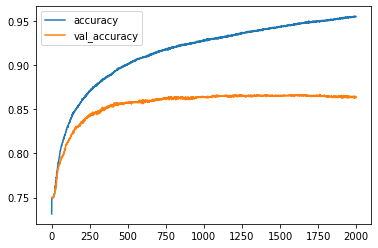

In [23]:
metrics[['accuracy', 'val_accuracy']].plot()

In [24]:
scorecard = []
#test
img_data= pandas.read_csv('drive/My Drive/korat_sauce/test_img_csv2.csv', header = None,na_values=0)
img_data = img_data.replace(np.nan,0)
train_data_list = np.array(img_data.loc[:, img_data.columns != 0])
sol_of_train_data = np.array(img_data[0])

prediction = model.predict(train_data_list)

 
label = prediction.argmax(axis=-1)

for num_row_data in range(len(train_data_list)):
  correct_label = int(sol_of_train_data[num_row_data])-1
  
  
  if (label[num_row_data] == correct_label):
        
        scorecard.append(1)
  else:
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass
scorecard_array = np.asarray(scorecard)
print ("performance = ", scorecard_array.sum() /scorecard_array.size*100)


performance =  67.22222222222223


In [25]:
print(train_data_list[0].shape)
print(train_data_list[0])
print(train_data_list.shape)
test_zero_array = np.zeros((1,3780))
print(test_zero_array.shape)
prediction1 = model.predict(test_zero_array)

(3780,)
[0.29102519 0.29102519 0.27554652 ... 0.         0.         0.01855827]
(180, 3780)
(1, 3780)
